In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('titanic-train.csv', index_col='person')

# mostrar alguns exemplos de registros
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home_destination
person,,,,,,,,,,,,
416,2,no,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.000,NaN,S,"Liverpool / Montreal, PQ"
194,1,no,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.000,C106,S,"Brockton, MA"
600,3,no,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.550,NaN,S,NaN
1112,3,no,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN
878,3,no,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.925,NaN,S,NaN


In [4]:
# quantos passageiros sobreviveram e quantos não?
data['survived'].value_counts()

no     550
yes    322
Name: survived, dtype: int64

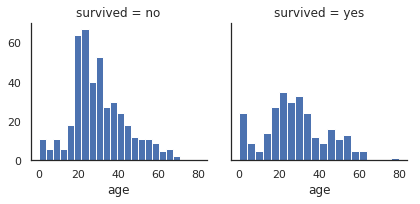

In [6]:
# crianças tiveram maiores chances de sobrevivência?
g = sns.FacetGrid(data, col='survived')
g.map(plt.hist, 'age', bins=20)

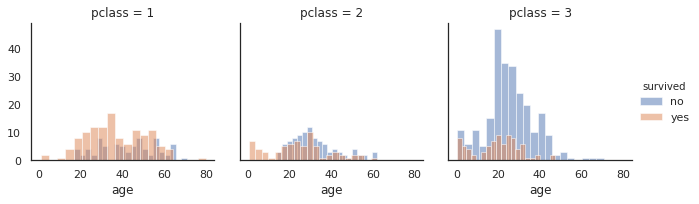

In [8]:
grid = sns.FacetGrid(data, col='pclass', hue='survived')
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

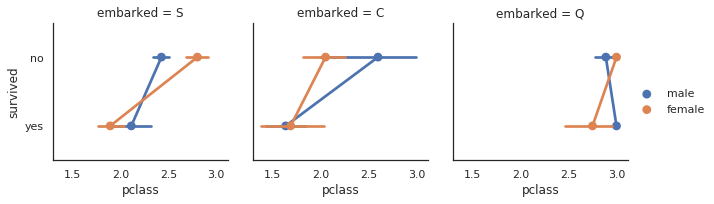

In [10]:
grid = sns.FacetGrid(data, col='embarked')
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

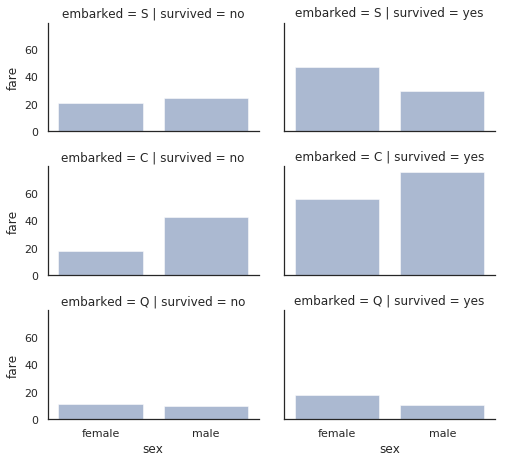

In [11]:
grid = sns.FacetGrid(data, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


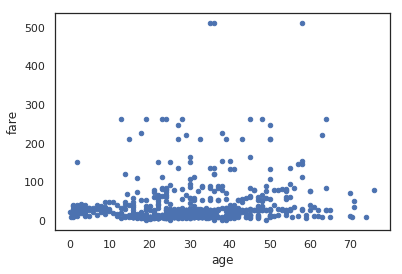

In [8]:
# gerar gráfico de dispersão simples
data.plot(kind="scatter", x="age", y="fare")

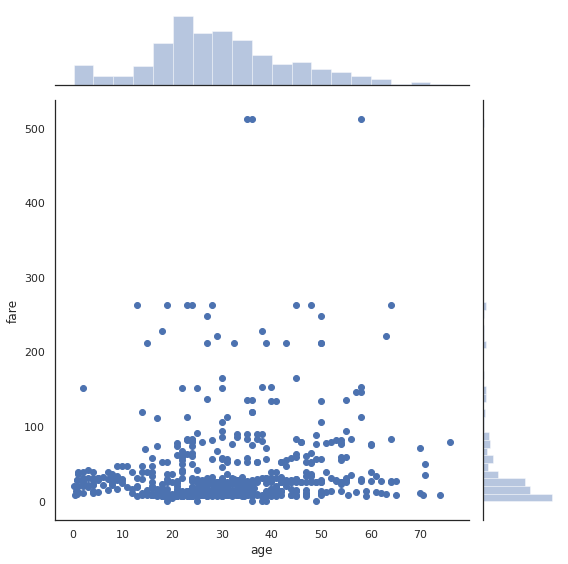

In [9]:
# gerar gráfico de dispersão com histograma usando o pacote seaborn
sns.jointplot(x="age", y="fare", data=data, size=8)

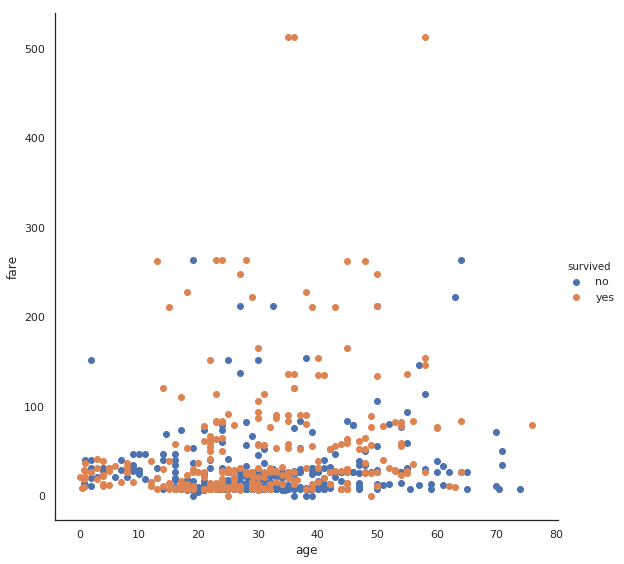

In [10]:
# gerar gráfico similar usando a espécie na cor
sns.FacetGrid(data, hue="survived", size=8) \
   .map(plt.scatter, "age", "fare") \
   .add_legend()

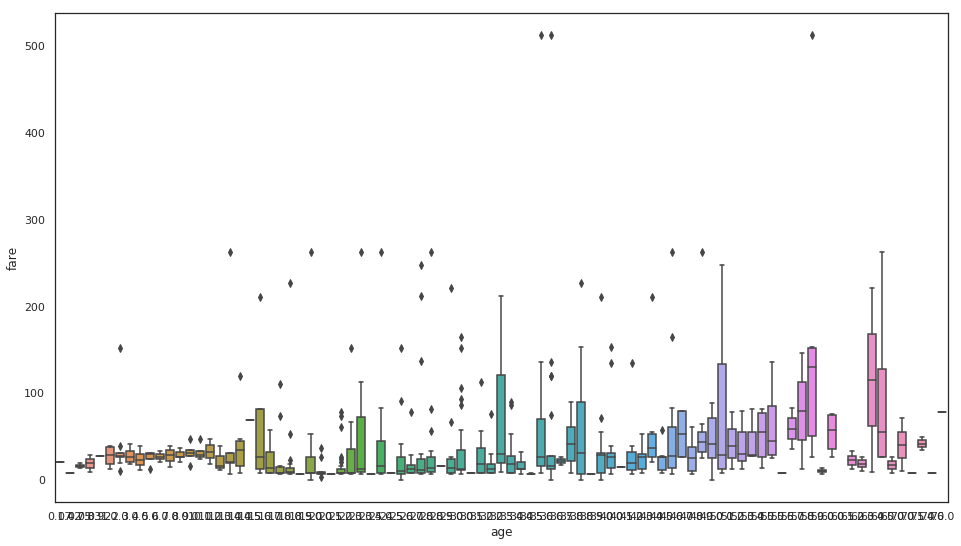

In [12]:
# gerar um gráfico do tipo boxplot sobre uma característica individual
plt.figure(figsize=(16, 9))
sns.boxplot(x="age", y="fare", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1217c05d68>,
      dtype=object)

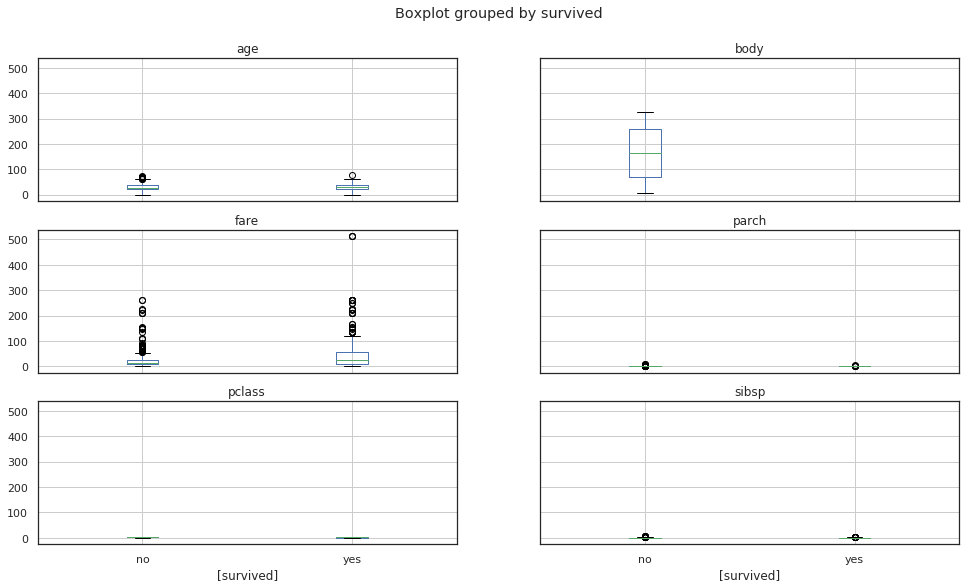

In [13]:
# gerar boxplot para cada uma das características por espécie
data.boxplot(by="survived", figsize=(16, 9))

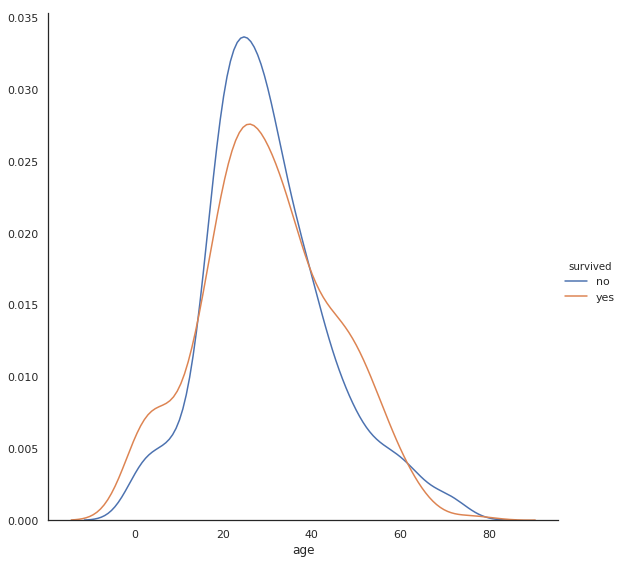

In [14]:
# gerar gráfico kde (densidade de kernel) sobre uma característica
sns.FacetGrid(data, hue="survived", size=8) \
   .map(sns.kdeplot, "age") \
   .add_legend()

ZeroDivisionError: 0.0 cannot be raised to a negative power

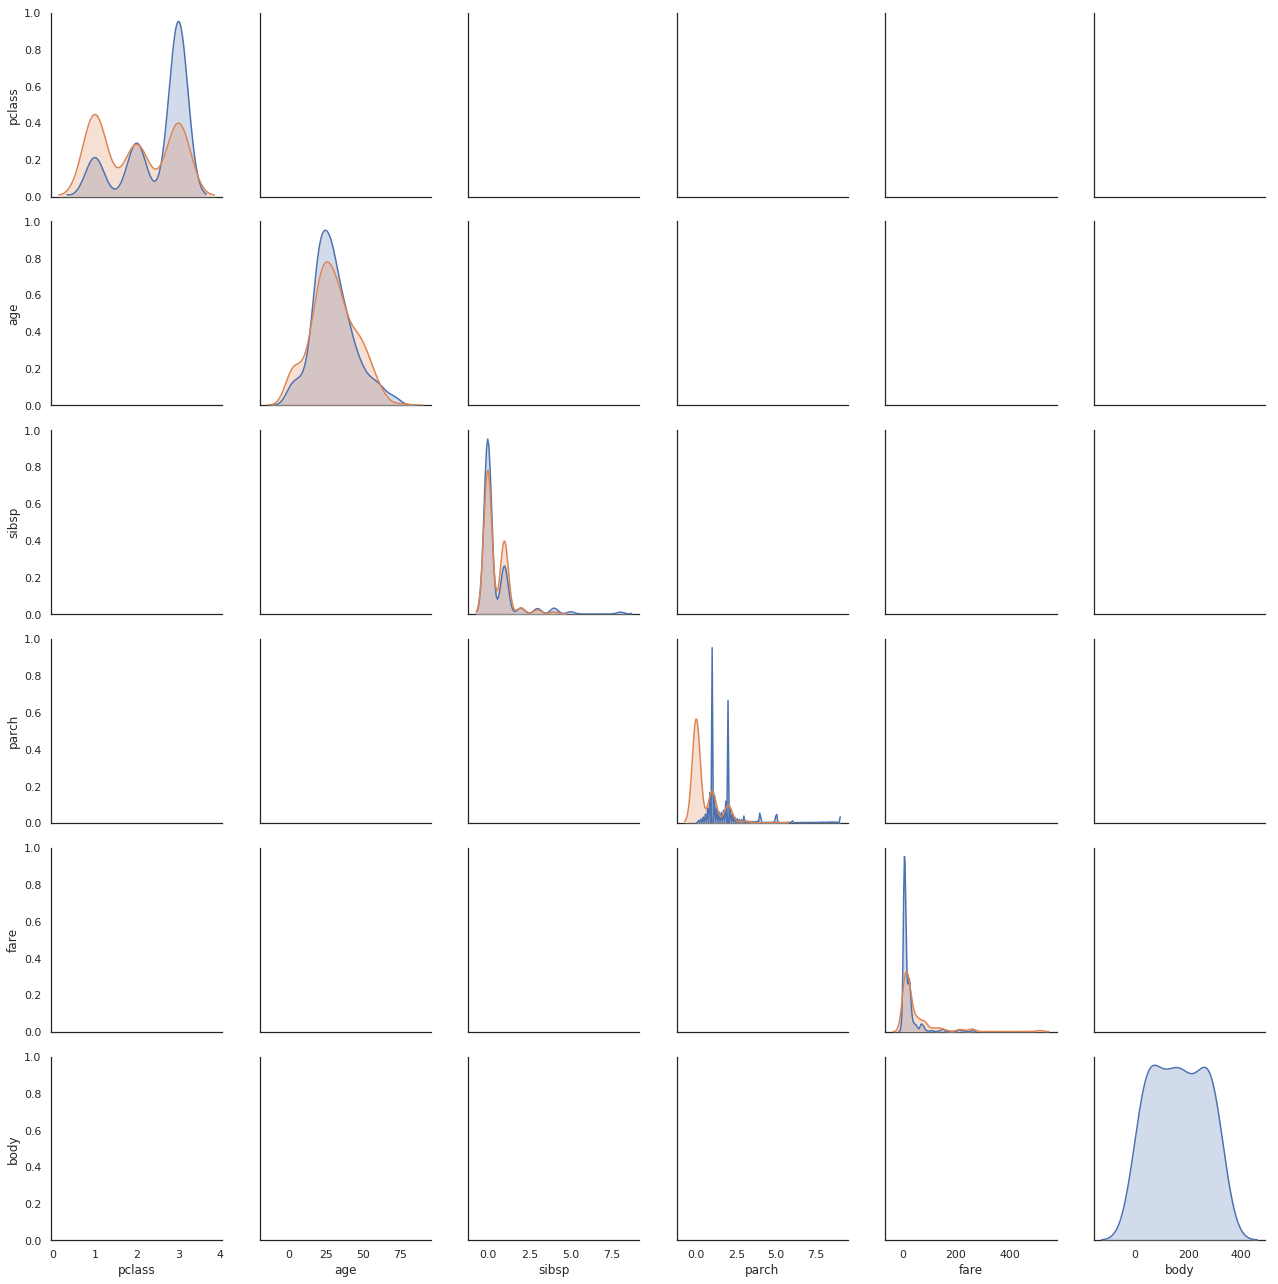

In [15]:
# gerar gráfico para analisar pares de características
sns.pairplot(data, hue="survived", size=3)

ZeroDivisionError: 0.0 cannot be raised to a negative power

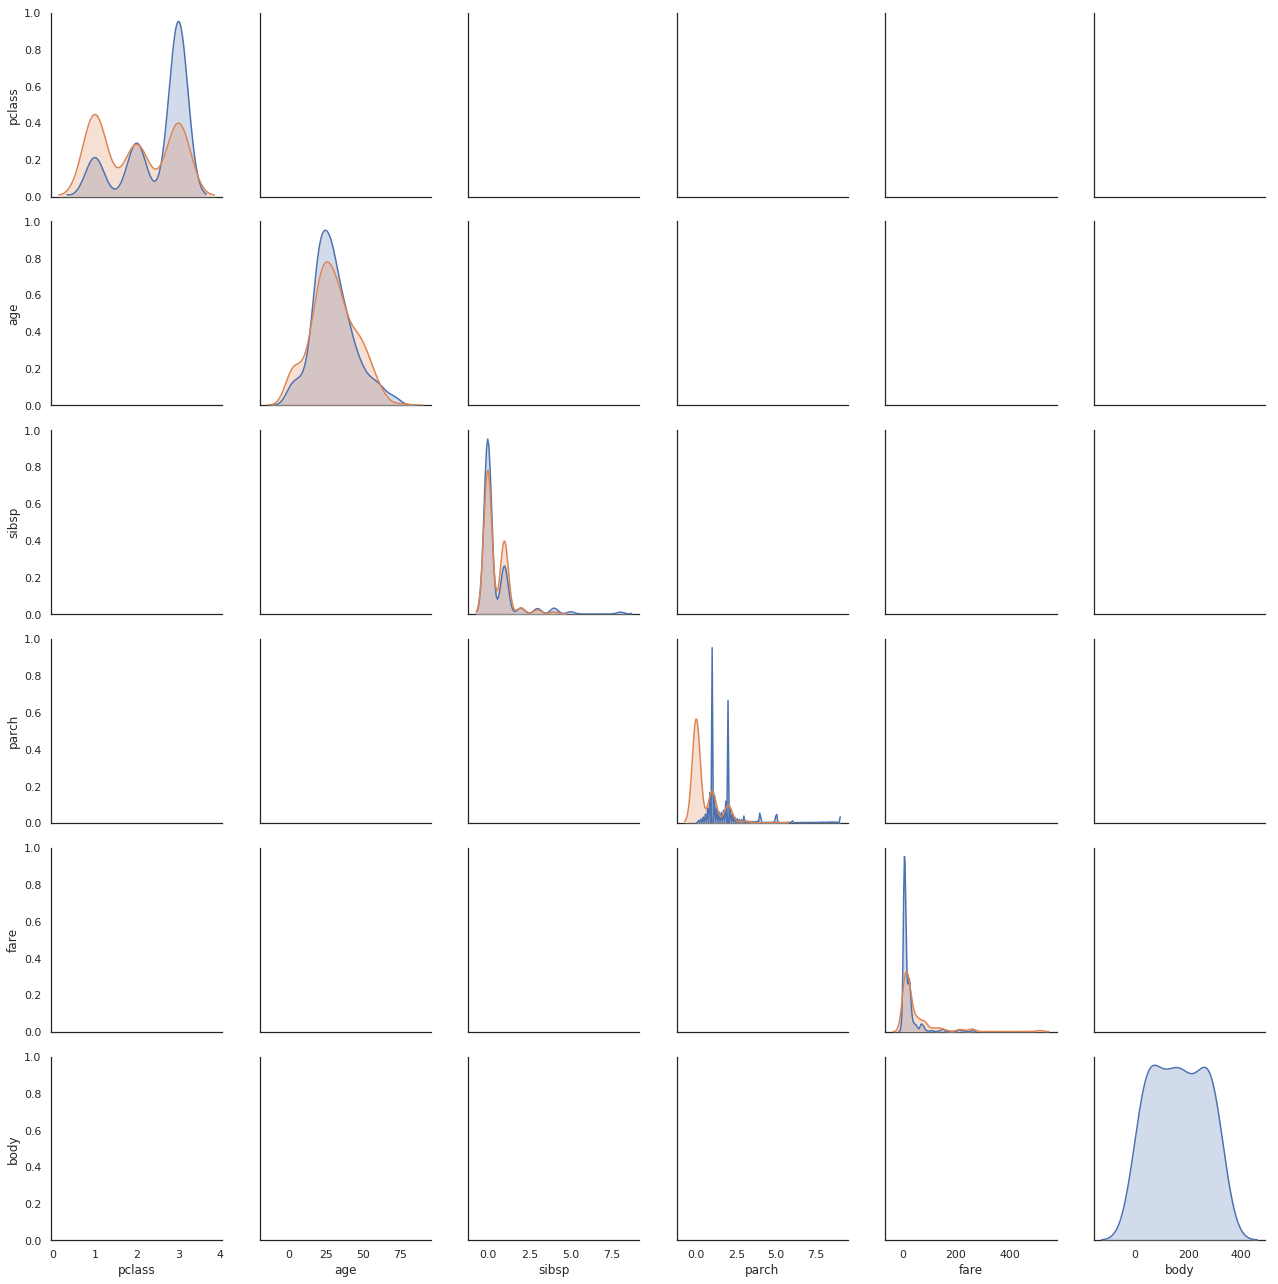

In [16]:
# gerar gráfico em pares com kde nas diagonais
sns.pairplot(data, hue="survived", size=3, diag_kind="kde")

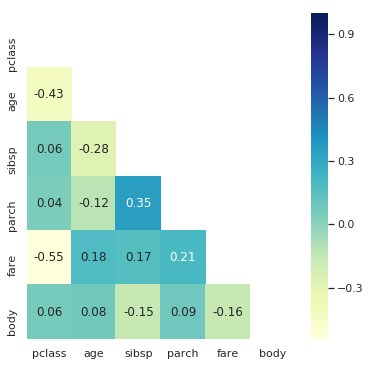

In [17]:
# gerar mapa de calor com a correlação das características
plt.figure(figsize=(6,6))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap="YlGnBu")

In [18]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home_destination'], dtype=object)

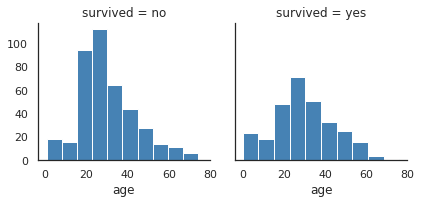

In [19]:
g = sns.FacetGrid(data, col="survived", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "age", color="steelblue") #, bins=bins)

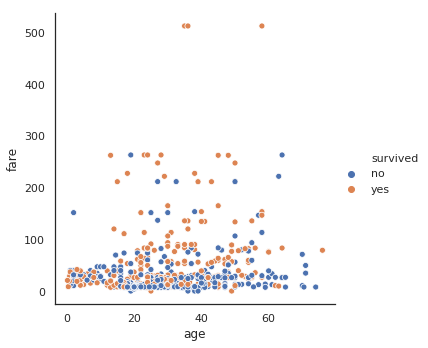

In [20]:
sns.relplot(x="age", y="fare", hue="survived", data=data)